# Coding the Logistic Perceptron Algorithm

Time to code! I have implemented the logistic perceptron algorithm to separate the following data (given in the file data.csv).

Recall that the perceptron step works as follows. For a point with coordinates (p,q) , label y, and prediction given by the equation y = step(w1*x1 + w2*x2 + b). Then find cross-entropy and error function as follows:

- If the point is correctly classified, do nothing.
- If the point is classified negative, but it has a positive label, add αp,αq, and α to w1, w2 and b respectively.


In [1]:
import numpy as np

In [2]:
# SIGMOID FUNCTION :
# The function should receive as input x,
# and return 1/1+e^(-x) .

def sigmoid(x):
    return 1/(1+np.exp(-x))

# Sigmoid Prime Function 

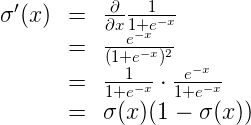

In [3]:
# SIGMOID PRIME FUNCTION :
# The function should receive as input t,
# and return sigmoid(t)*(1-sigmoid(t))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

In [4]:
# Prediction FUNCTION :
# The function should receive as input Data X, weights W, and bias b
# and return sigmoid(W*X+b)
def prediction(X, W, b):
    return sigmoid(np.matmul(X,W)+b)

In [5]:
# Cross function that takes as input two lists Y, P,
# and returns the list of errors.
def cross_entropy(Y, yHat):
    return [-y[i]*np.log(y_hat[i]) - (1-y[i])*np.log(1-y_hat[i]) for i in range(len(y))]

In [7]:
#Error function:
# cross entropy divided by number of errors.
def errorFunction(Y,yHat):
    ev = cross_entropy(Y,yHat)
    return sum(ev)/len(ev)

In [8]:
# Derivative of errors:
# The result should be a list of three lists:
# The first list should contain the gradient (partial derivatives) with respect to w1
# The second list should contain the gradient (partial derivatives) with respect to w2
# The third list should contain the gradient (partial derivatives) with respect to b
def dErrors(X, y, y_hat):
    DErrorsDx1 = [X[i][0]*(y[i]-y_hat[i]) for i in range(len(y))]
    DErrorsDx2 = [X[i][1]*(y[i]-y_hat[i]) for i in range(len(y))]
    DErrorsDb = [y[i]-y_hat[i] for i in range(len(y))]
    return DErrorsDx1, DErrorsDx2, DErrorsDb

In [9]:
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b.
# It should calculate the prediction, the gradients, and use them to
# update the weights and bias W, b. Then return W and b.
# The error e will be calculated and returned for you, for plotting purposes.
def gradientDescentStep(X, y, W, b, learn_rate = 0.01):
    yHat = prediction(X,W,b)
    errors = cross_entropy(y, yHat)
    derivErrors = dErrors(X, y, yHat)
    W[0] += sum(derivErrors[0])*learn_rate
    W[1] += sum(derivErrors[1])*learn_rate
    b += sum(derivErrors[2])*learn_rate
    return W, b, sum(errors) 

In [15]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainLR(X, y, learn_rate = 0.01, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    # Initialize the weights randomly
    W = np.array(np.random.rand(2,1))*2 -1
    b = np.random.rand(1)[0]*2 - 1
    # These are the solution lines that get plotted below.
    boundary_lines = []
    errors = []
    for i in range(num_epochs):
        # In each epoch, we apply the gradient descent step.
        W, b, error = gradientDescentStep(X, y, W, b, learn_rate)
        errors.append(error)
    boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines, errors
